In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
from LookbackTimeLib import *
Npast = int(Nframes*(-tmin)/(tmax-2*tmin))

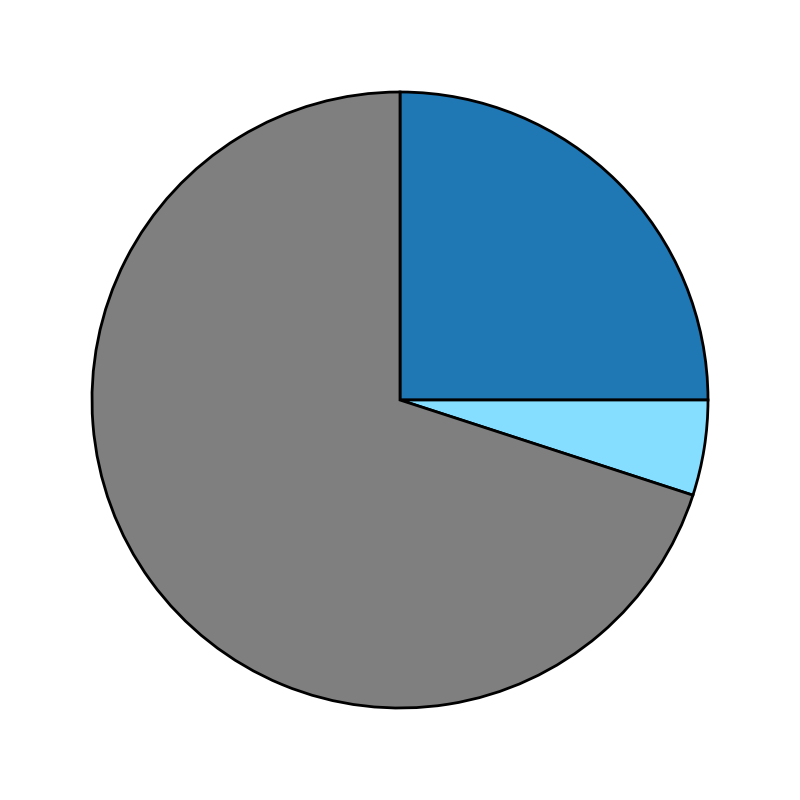

In [3]:
# Data for the pie chart
values = [25, 5, 70]
colors = ['C0', '#85ddff', 'C7']

# Create the pie chart
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

# Plot the pie chart with custom colors and without labels
patches, texts, autopcts = ax.pie(values, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False,
                         wedgeprops={'edgecolor': 'black', 'lw': 2})

# Disable text labels in the sectors
for autopct in autopcts:
    autopct.set_visible(False)

# Display the pie chart
ax.set_aspect('equal')  # Equal aspect ratio ensures that the pie chart is circular.
fig.tight_layout()
fig.savefig("output/PieChartLCDMNow.png", dpi=300, transparent=True)

In [4]:
class movie:
    def __init__(self, t, a, Om0, Ode0):
        plt.clf()
        self.fig = plt.figure(figsize=(8, 8))
        self.ax = self.fig.gca()
        self.steps = len(t)
        self.t, self. a = t, a
        self.Om0, self.Ode0 = Om0, Ode0
        
        # Setup the pie chart
        self.ax.set_aspect('equal')  # Equal aspect ratio ensures that the pie chart is circular.
        self.fig.tight_layout()
        
    def show(self):
        self.fig.show()
    
    # Initialization function
    def init(self):
        # Data for the pie chart
        values = [self.Om0*self.a[0]**(-3), self.Ode0]
        colors = ['C0', 'C7']

        # Plot the pie chart with custom colors and without labels
        self.patches, self.texts, self.autopcts, = self.ax.pie(values, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False,
                                 wedgeprops={'edgecolor': 'black', 'lw': 2})

        # Disable text labels in the sectors
        for autopct in self.autopcts:
            autopct.set_visible(False)

        return self.patches, self.texts, self.autopcts,

    # Update function
    def update(self, frame):
        # Data for the pie chart
        values = [self.Om0*self.a[frame]**(-3), self.Ode0]
        colors = ['C0', 'C7']
        
        # Plot the pie chart with custom colors and without labels
        self.ax.clear()
        self.patches, self.texts, self.autopcts, = self.ax.pie(values, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False,
                                 wedgeprops={'edgecolor': 'black', 'lw': 2})
        
        # Disable text labels in the sectors
        for autopct in self.autopcts:
            autopct.set_visible(False)
        
        return self.patches, self.texts, self.autopcts,
        
    # Create the animation
    def animate(self):
        animation = FuncAnimation(self.fig, self.update, frames=len(self.t), init_func=self.init, blit=False)
        return animation

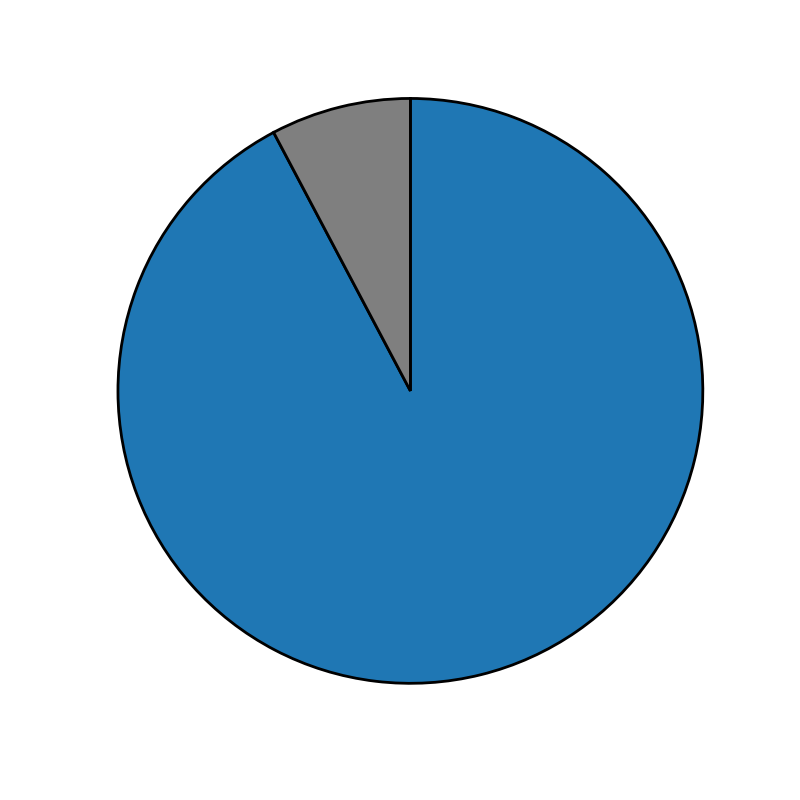

In [5]:
i=120
frame = movie(t, a4*acrit1, w0waCDM4.Om(a2z(1.)), w0waCDM4.Ode(a2z(1.)))
frame.init();
frame.update(i);

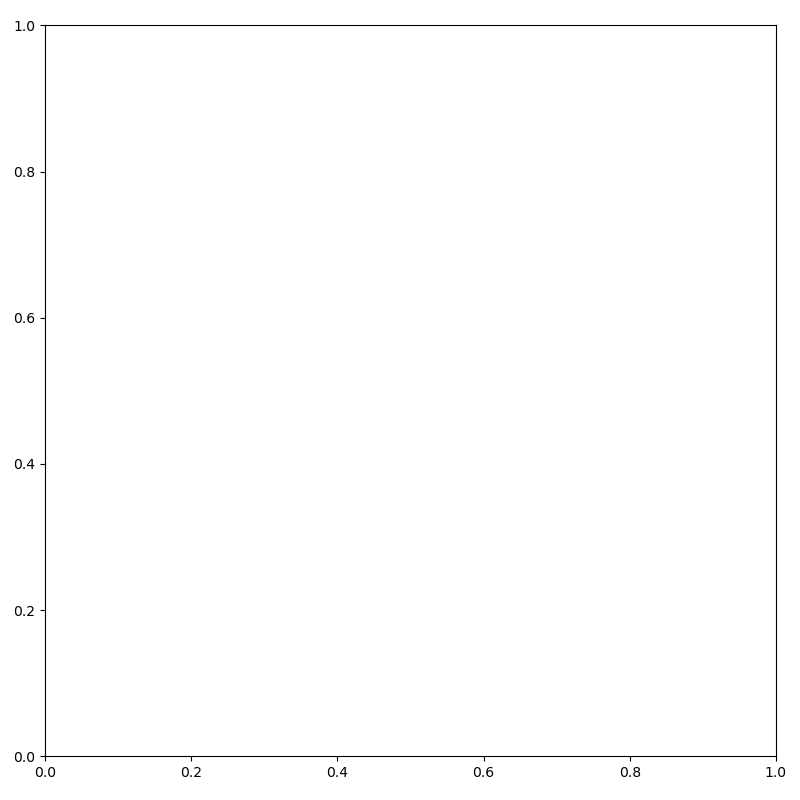

In [6]:
this_movie = movie(t, a4*acrit1, w0waCDM4.Om(a2z(1.)), w0waCDM4.Ode(a2z(1.)))
animation = this_movie.animate()

In [7]:
animation.save("output/PieDiagramLCDM.mp4", dpi=300, fps=48)